# Parte I - Análisis Exploratorio

Deberán realizar 6 visualizaciones interesantes que ayuden a explicar el target haciendo almenos un plot de cada uno de los siguientes tipos:

* Bar plot (o stacked bar plot o variaciones)
* Violin plot
* Box plot
* Heatmap

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df  = pd.read_parquet('/content/drive/MyDrive/Datos/TP3/train')
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,content,surprise1,surprise2,popular,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.200000,0.500000,-0.187500,0.000000,0.187500,\nHaving trouble finding something to watch on...,the world,"amusement,disgust",False,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,-0.100000,0.000000,0.000000,0.500000,0.000000,\nThe Associated Press is the latest news orga...,business,,False,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,-0.133333,0.000000,0.000000,0.500000,0.000000,\nIt looks like 2012 was a pretty good year fo...,the world,,False,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,-0.166667,0.000000,0.000000,0.500000,0.000000,"\nWhen it comes to college football, NASA astr...",sports,,False,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,-0.050000,0.454545,0.136364,0.045455,0.136364,\nLAS VEGAS -- Sharing photos and videos on yo...,the world,,False,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35658,http://mashable.com/2014/10/28/cree-led-light-...,72.0,12.0,323.0,0.573668,1.0,0.729282,4.0,1.0,0.0,...,-0.155556,0.288889,-0.155556,0.211111,0.155556,\nLED lighting is more power-efficient and las...,science/tech,,True,42000
35659,http://mashable.com/2014/10/28/dancing-with-th...,72.0,13.0,433.0,0.563084,1.0,0.756654,3.0,2.0,9.0,...,-0.166667,0.833333,0.500000,0.333333,0.500000,"\nWith only eight couples left, ABC had to fin...",the world,,False,2300
35660,http://mashable.com/2014/10/28/dangerous-airpo...,72.0,13.0,1061.0,0.498020,1.0,0.686688,5.0,5.0,1.0,...,-0.050000,0.400000,-0.400000,0.100000,0.400000,\nParo Airport in Bhutan is located in a deep ...,the world,"disgust,optimism",False,567
35661,http://mashable.com/2014/10/28/disney-villains...,72.0,13.0,1777.0,0.449708,1.0,0.631970,36.0,28.0,12.0,...,-0.100000,0.000000,0.000000,0.500000,0.000000,"\nDisney villains are evil, but no one tops th...",the world,"love,optimism",False,783


### Histograma

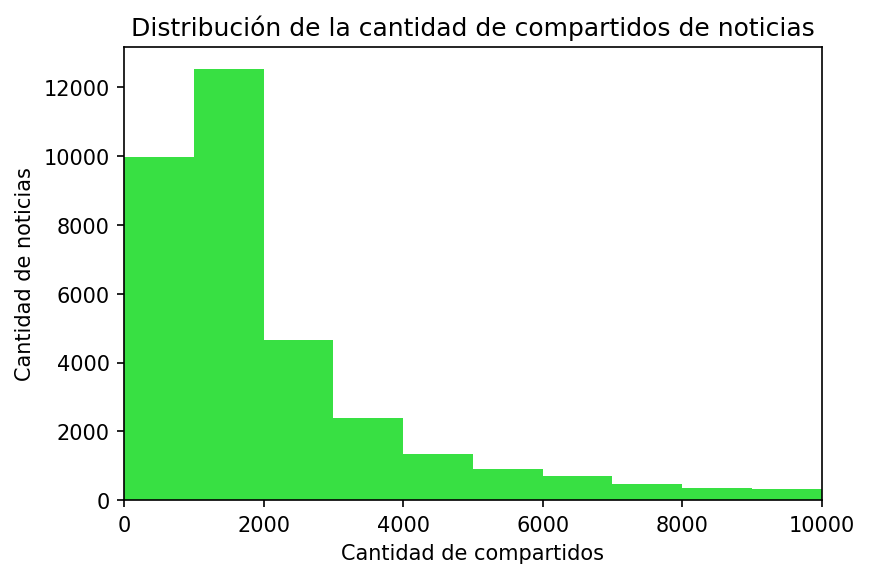

In [ ]:
plt.figure(dpi=150)
plt.hist(df.shares, color='#38e043', bins=10, range=[0, 10000])
plt.title("Distribución de la cantidad de compartidos de noticias")
plt.xlim(0, 10000)
plt.xlabel("Cantidad de compartidos")
plt.ylabel("Cantidad de noticias")
plt.show()

### Bar plot x2

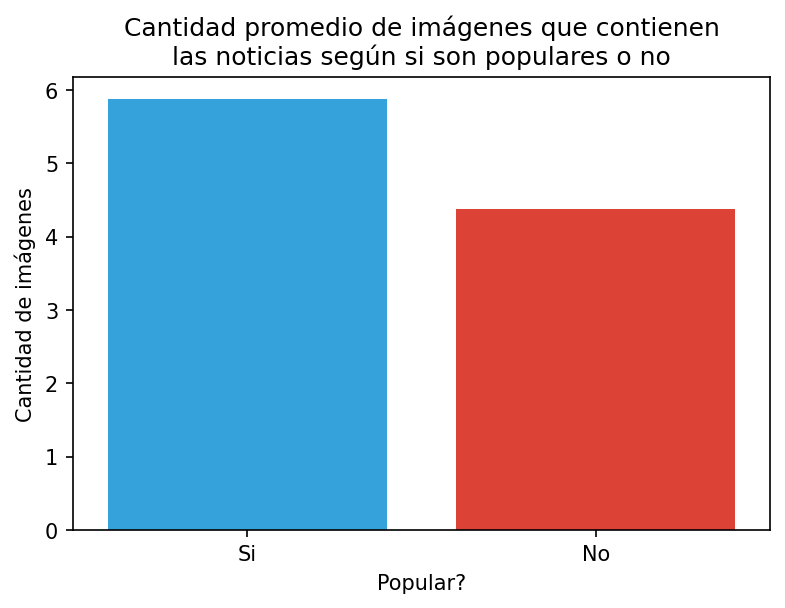

In [ ]:
plt.figure(dpi=150)
g = sns.barplot(data=df, x='popular', y='num_imgs', palette=['#1baaf7', '#f72a1b'], ci=None, order=[True, False])
g.set_xticklabels(['Si', 'No'])
plt.xlabel('Popular?')
plt.ylabel('Cantidad de imágenes')
plt.title('Cantidad promedio de imágenes que contienen\nlas noticias según si son populares o no')
plt.show()

In [ ]:
df.surprise1.value_counts()

the world       24893
business         4649
sports           4103
science/tech     2018
Name: surprise1, dtype: int64

In [ ]:
categories = df[df['shares'] > 10000].surprise1.value_counts().to_dict()

for c in categories:
  n = df.loc[df.surprise1 == c, 'surprise1'].count()
  categories[c] = categories[c] / n

names = list(categories.keys())
values = list(categories.values())

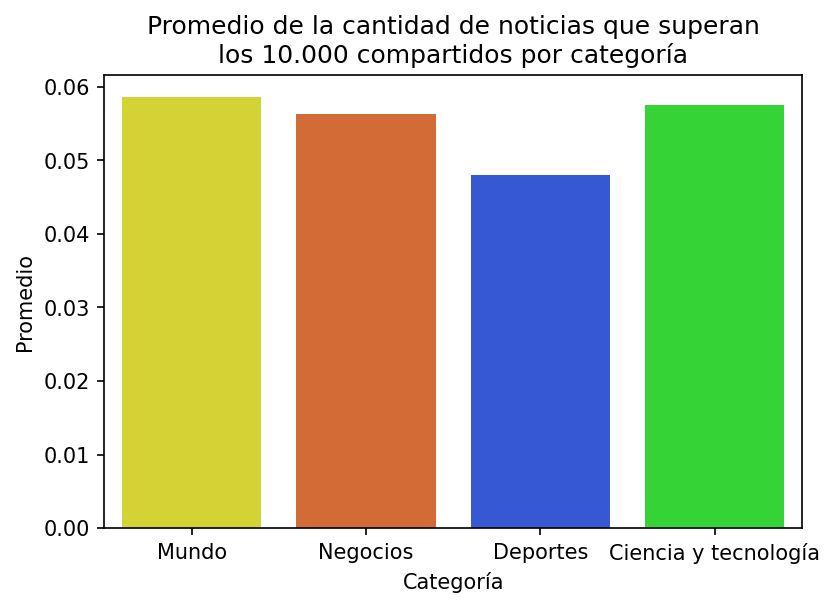

In [ ]:
plt.figure(dpi=150)
g = sns.barplot(data=df, x=names, y=values, palette=['#eded1c', '#ed621c', '#1c49ed', '#1ced1c'])
g.set_xticklabels(["Mundo", "Negocios", "Deportes", "Ciencia y tecnología"])
plt.xlabel('Categoría')
plt.ylabel('Promedio')
plt.title('Promedio de la cantidad de noticias que superan\nlos 10.000 compartidos por categoría')
plt.show()

### Violin plot

In [ ]:
df['emotion'] = df.surprise2.map(lambda x: x.split(',')[0])
df.emotion.value_counts()

                  21837
disgust            4679
love               2260
joy                1736
amusement          1732
disappointment     1039
fear                984
gratitude           797
optimism            483
nervousness          41
embarrassment        41
anger                23
neutral              10
annoyance             1
Name: emotion, dtype: int64

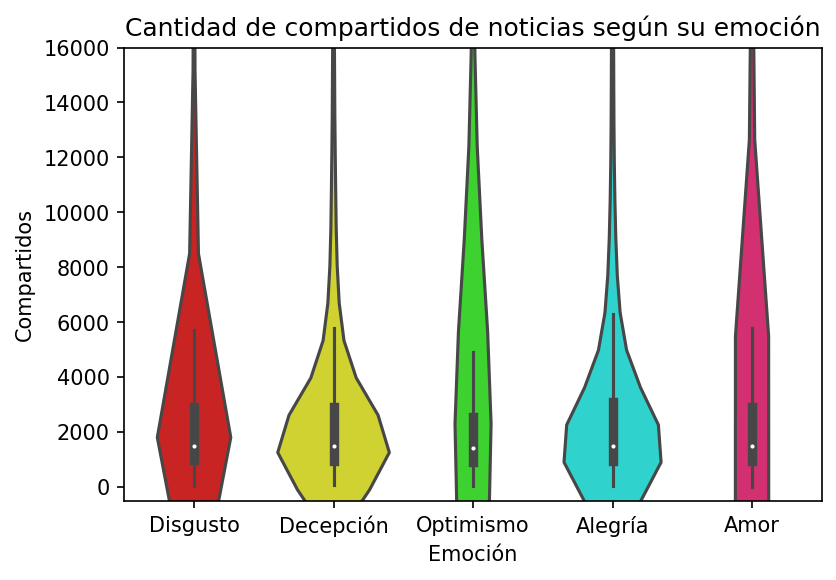

In [ ]:
plt.figure(dpi=150)
g = sns.violinplot(data=df, x='emotion', y='shares', order=['disgust', 'disappointment', 'optimism', 'joy', 'love'], 
                   palette=['#e30909', '#e9ed15', '#27ed15', '#15ede6', '#ed156b'], hist_kws={'alpha': 0.8})
g.set_xticklabels(['Disgusto', 'Decepción', 'Optimismo', 'Alegría', 'Amor'])
plt.xlabel('Emoción')
plt.ylabel('Compartidos')
plt.ylim(-500, 16000)
plt.title('Cantidad de compartidos de noticias según su emoción')
plt.show()

### Box plot

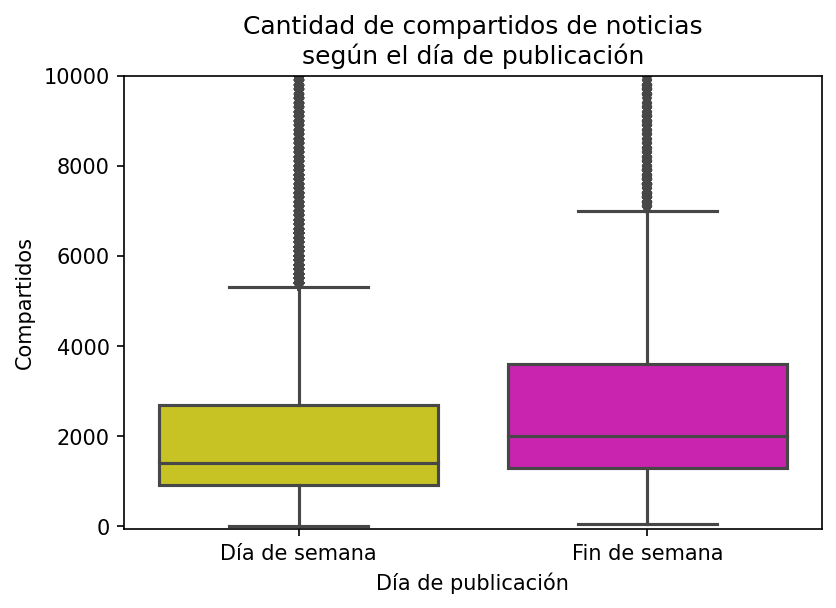

In [ ]:
plt.figure(dpi=150)
g = sns.boxplot(data=df, x='is_weekend', y='shares', palette=['#e3dc09', '#e309c2'])
g.set_xticklabels(['Día de semana', 'Fin de semana'])
plt.xlabel('Día de publicación')
plt.ylabel('Compartidos')
plt.title('Cantidad de compartidos de noticias\nsegún el día de publicación')
plt.ylim(-50,10000)
plt.show()

### Heatmap

In [ ]:
df.n_tokens_title.value_counts()

10.0    6777
11.0    6265
9.0     5834
12.0    4610
8.0     3966
13.0    2955
7.0     2004
14.0    1390
6.0      774
15.0     590
16.0     191
5.0      183
17.0      68
4.0       27
18.0      19
19.0       4
3.0        3
2.0        1
20.0       1
Name: n_tokens_title, dtype: int64

In [ ]:
def parse_title_tokens(n_tokens):
  if n_tokens <= 5:
    return "5 o menos"
  if n_tokens <= 10:
    return "Entre 5 y 10"
  if n_tokens <= 15:
    return "Entre 10 y 15"
  return "Más de 15"

In [ ]:
def parse_content_tokens(n_tokens):
  if n_tokens <= 100:
    return "200 o menos"
  if n_tokens <= 400:
    return "Entre 200 y 400"
  if n_tokens <= 600:
    return "Entre 400 y 600"
  if n_tokens <= 800:
    return "Entre 600 y 800"
  return "Más de 800"

In [ ]:
df['title_tokens'] = df.n_tokens_title.map(parse_title_tokens)
df['content_tokens'] = df.n_tokens_content.map(parse_content_tokens)

In [ ]:
matriz = pd.pivot_table(df, values='shares', index='title_tokens', columns='content_tokens', aggfunc='mean')
matriz = matriz.reindex(['Más de 15', 'Entre 10 y 15', 'Entre 5 y 10', '5 o menos'])
matriz

content_tokens,200 o menos,Entre 200 y 400,Entre 400 y 600,Entre 600 y 800,Más de 800
title_tokens,,,,,
Más de 15,1375.333333,5178.909836,4106.233333,2879.789474,2698.534483
Entre 10 y 15,3723.899671,3819.242653,3154.727210,3270.892350,3576.659536
Entre 5 y 10,3035.041013,3536.466089,2843.735230,2902.556288,3707.032958
5 o menos,1797.272727,2782.428571,2635.484848,2389.208333,4808.121951


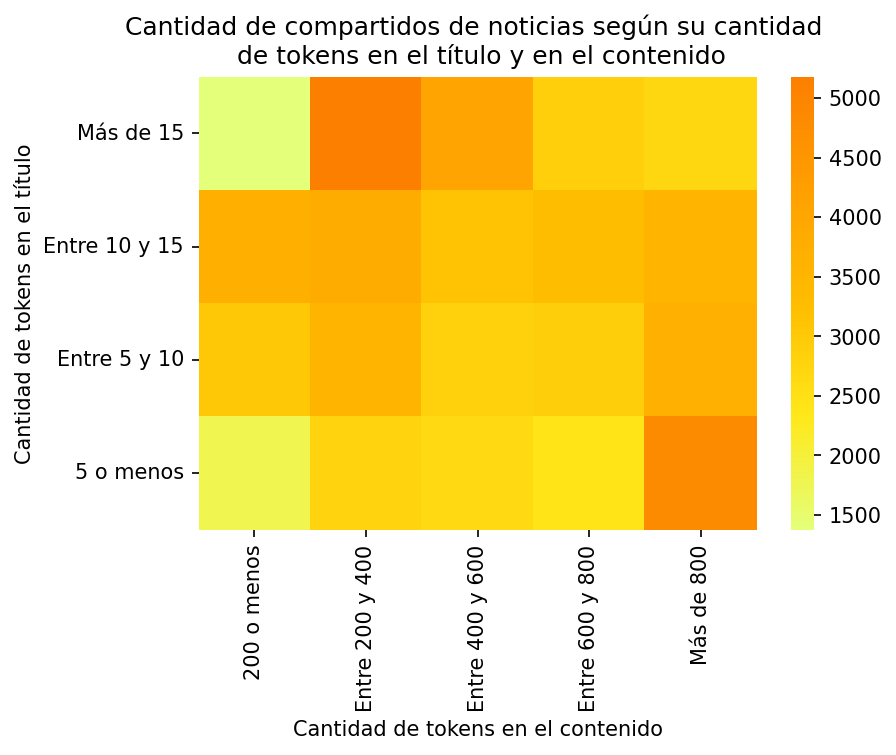

In [ ]:
plt.figure(dpi=150)
g = sns.heatmap(matriz, cmap='Wistia')
plt.xticks(rotation=90)
plt.title('Cantidad de compartidos de noticias según su cantidad \n de tokens en el título y en el contenido')
plt.ylabel('Cantidad de tokens en el título')
plt.xlabel('Cantidad de tokens en el contenido')
plt.show()